In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data= pd.read_csv("/content/drive/MyDrive/cohort/train (1).csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


CHECKPOINT 1 -- Write the code to display the "last" few rows of the dataset

In [6]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
feature = ["Name","Ticket","Cabin"]
data.drop(feature, axis = 1, inplace= True)

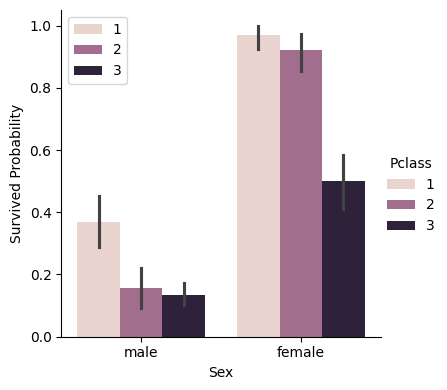

In [8]:
x = sns.catplot(x="Sex", y="Survived", data=data, kind="bar", height=4, hue="Pclass")
x.set_ylabels("Survived Probability")
plt.legend()
plt.show()

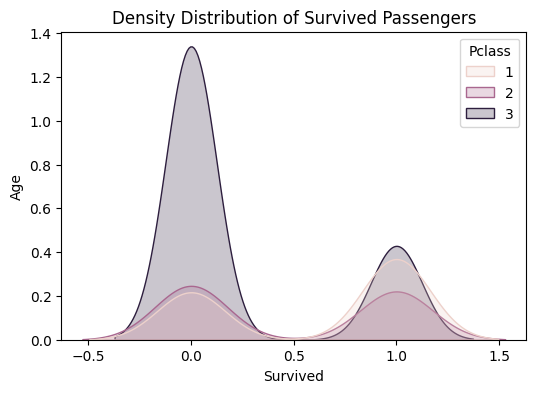

In [9]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x='Survived', fill=True, hue = "Pclass")
plt.title('Density Distribution of Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

<Axes: xlabel='Embarked'>

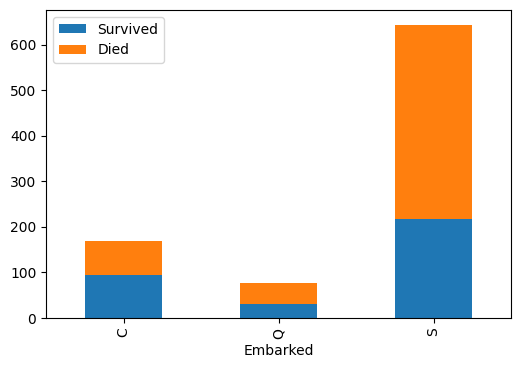

In [10]:
data["Died"]=  1 - data["Survived"]
data.groupby("Embarked").agg("sum")[["Survived", "Died"]].plot(kind= "bar", figsize=(6,4), stacked = True)

In [18]:
df = sns.load_dataset('titanic')

CHECKPOINT 2-- Try to draw a boxplot using any two columns.

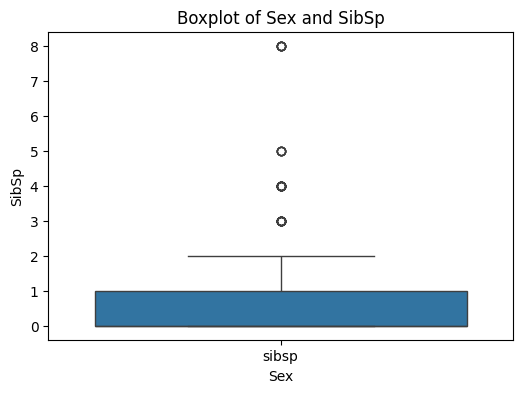

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['sex', 'sibsp']])
plt.title('Boxplot of Sex and SibSp')
plt.xlabel('Sex')
plt.ylabel('SibSp')
plt.show()

In [23]:
mean_age= data["Age"].mean()
data["Age"]= data["Age"].fillna(mean_age)

In [24]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Died           0
dtype: int64

In [25]:
data.dropna(subset=["Embarked"], inplace=True)

In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Died           0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Died         889 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 76.4+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [29]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Died
0,1,0,3,1,22.0,1,0,7.2500,2,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,2,0
3,4,1,1,0,35.0,1,0,53.1000,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,1


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [31]:
x = data.drop(["Survived", "Died"], axis= 1) #independent features
y = data[["Survived"]] #dependent features

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=.20, random_state=42)

In [33]:
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

xtrain shape: (711, 8)
xtest shape: (178, 8)
ytrain shape: (711, 1)
ytest shape: (178, 1)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [36]:
knn = KNeighborsClassifier(n_neighbors= 5) #n_neighbours = number of neighbors
svmc = SVC(C = 5) #C -> regularization parameter for better tradeoff between low training and low testing error

In [37]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

CHECKPOINT 3 --- fit the training data in the SVM model

In [38]:
from sklearn.svm import SVC

In [40]:
svm_classifier = SVC(kernel='linear')

In [43]:
svm_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [44]:
from sklearn.metrics import accuracy_score, r2_score
def acc(model):
    model.fit(xtrain, ytrain)
    train_predictions = model.predict(xtrain)
    test_predictions = model.predict(xtest)
    train_accuracy = accuracy_score(ytrain, train_predictions)
    test_accuracy = accuracy_score(ytest, test_predictions)
    print(f"Training Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")

In [45]:
#Lets now use it. You can use it for the svm to check the results as well.
acc(knn)

Training Accuracy: 70.75%
Test Accuracy: 58.99%


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
rnd= RandomForestClassifier(n_estimators= 800,ccp_alpha=.01) #n_estimators decide the number of trees
#ccp_alpha is a complexity parameter which uses Minimal Cost Complexity Pruning
#Here higher values gets pruned, controlling tree size
grb = GradientBoostingClassifier(learning_rate = 0.001, n_estimators=1000)
#learning rate basically controls how quickly or slowly model learns from training data

In [54]:
rnd.fit(xtrain,ytrain)
grb.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000)

In [49]:
acc(rnd)

Training Accuracy: 83.68%
Test Accuracy: 80.90%


In [50]:
acc(grb)

Training Accuracy: 83.26%
Test Accuracy: 82.58%


CHECKPOINT 4-- Now import, initiate and fit the training data for XGBoost Model. Use the acc() helper function.

In [58]:
import xgboost as xgb

In [60]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.001, n_estimators=1000)
xgb_classifier.fit(xtrain, ytrain)
acc(xgb_classifier)

Training Accuracy: 88.33%
Test Accuracy: 80.34%


In [70]:
#Now we want our model to predict on real time values. Here is the function:
def predict_survival(model):
    PassengerId = int(input("Enter PassengerId: "))
    Pclass = int(input("Enter Pclass: "))
    Sex = input("Enter Sex: ")
    if Sex == "male":
        Sex = 0
    elif Sex == "female":
        Sex = 1
    else:
        raise ValueError("Invalid input for Sex")
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter SibSp: "))
    Parch = int(input("Enter Parch: "))
    Fare = float(input("Enter Fare: "))
    Embarked = input("Enter Embarked: ")
    if Embarked == "S":
        Embarked = 0
    elif Embarked == "C":
        Embarked = 1
    elif Embarked == "Q":
        Embarked = 2
    else:
        raise ValueError("Invalid input for Embarked")
    new_data = pd.DataFrame({
        'PassengerId': [PassengerId],
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    })
    prediction = model.predict(new_data)
    return "Passenger Survived" if prediction[0] == 1 else "Passenger Did not survive"

In [73]:
predict_survival(grb)

Enter PassengerId: 1
Enter Pclass: 3
Enter Sex: male
Enter Age: 22
Enter SibSp: 1
Enter Parch: 0
Enter Fare: 7.25
Enter Embarked: S


'Passenger Did not survive'